In [4]:
import sys, codecs, re, pdb, time, datetime, math, tqdm, pickle, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import numpy as np;
import seaborn as sns;
%matplotlib inline

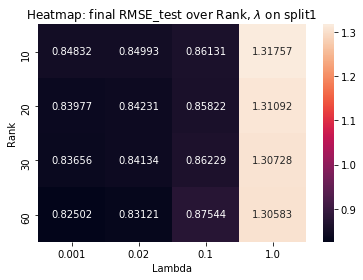

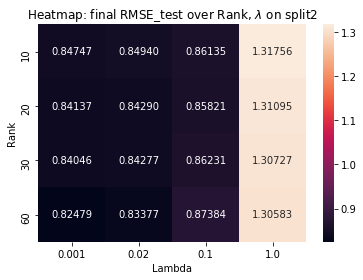

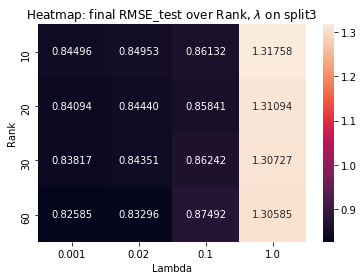

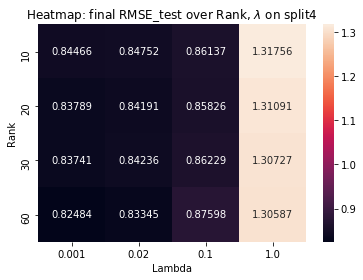

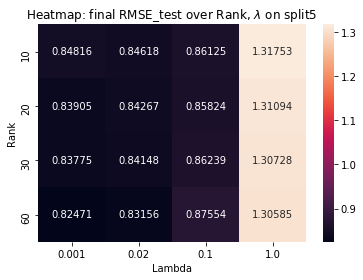

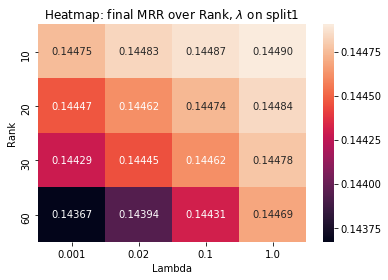

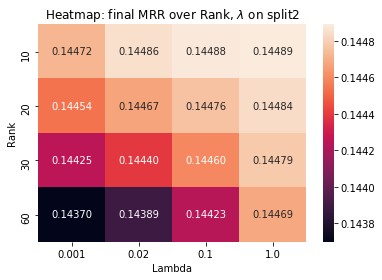

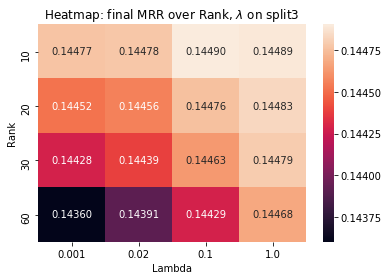

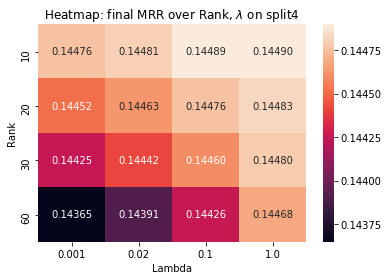

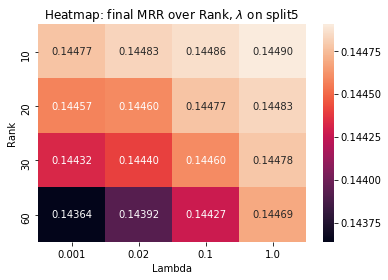

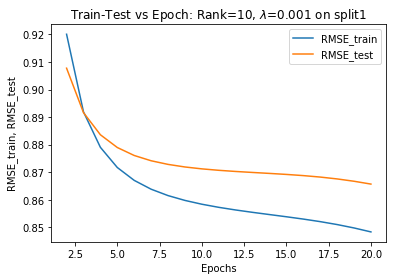

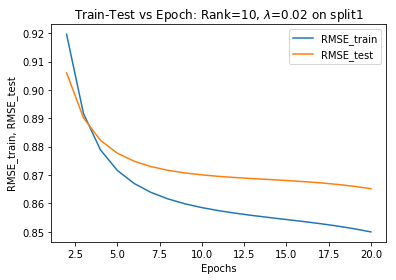

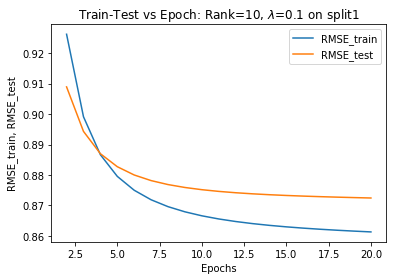

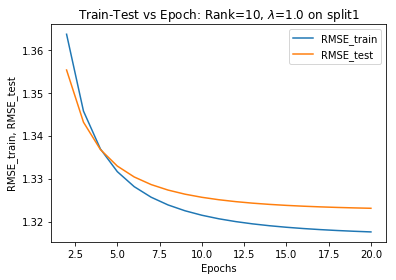

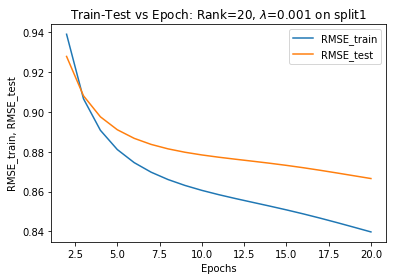

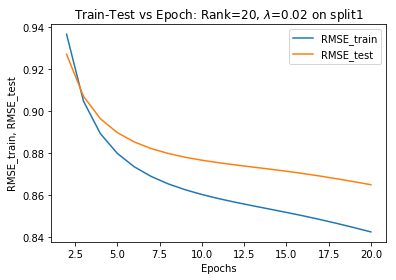

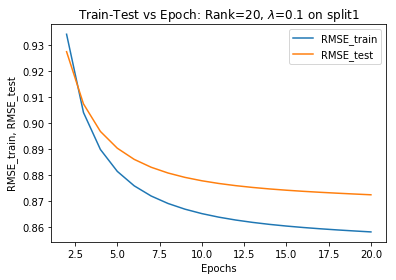

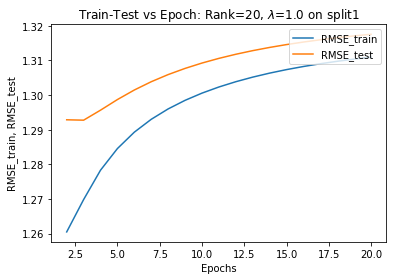

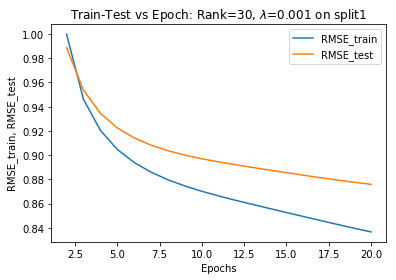

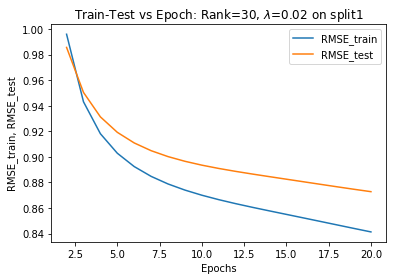

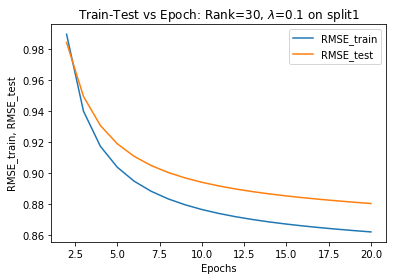

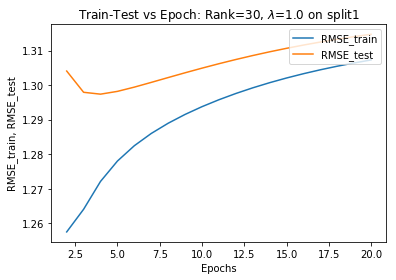

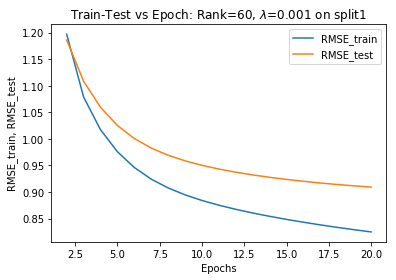

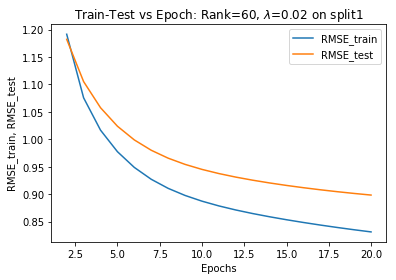

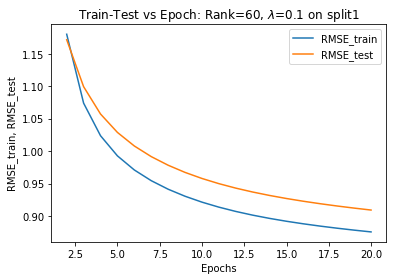

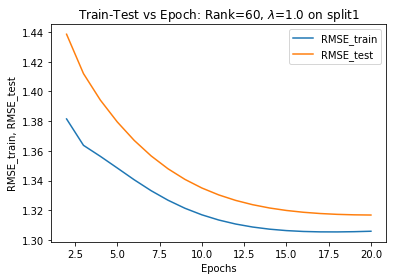

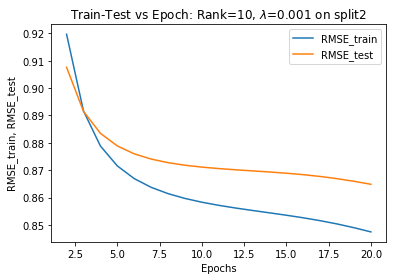

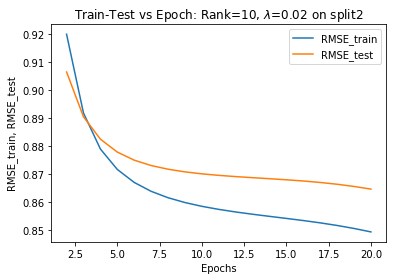

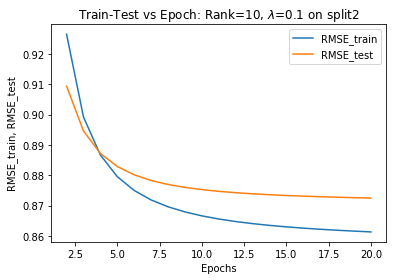

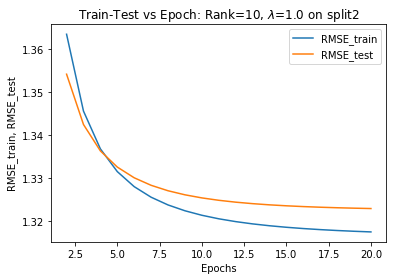

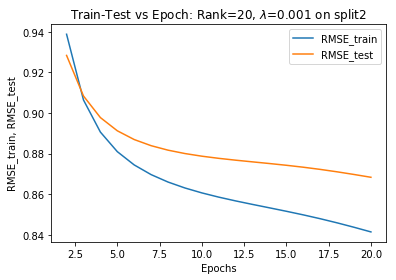

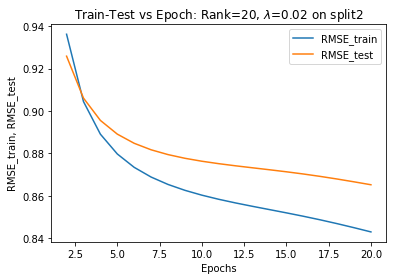

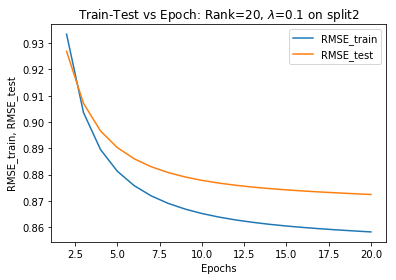

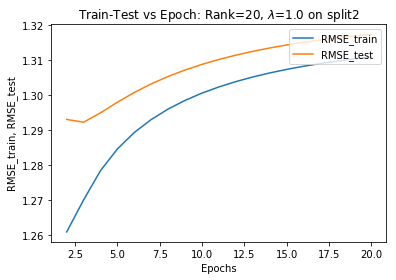

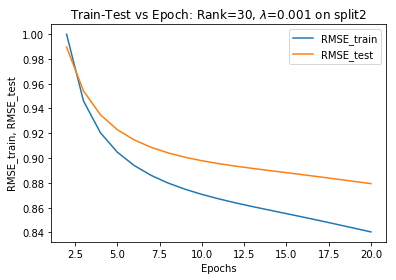

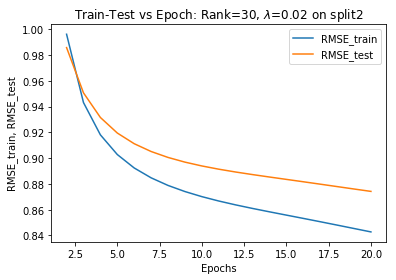

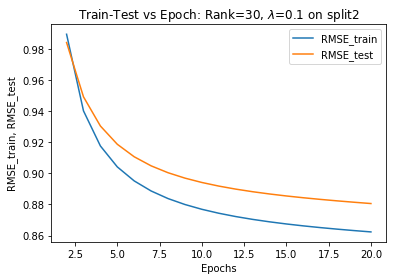

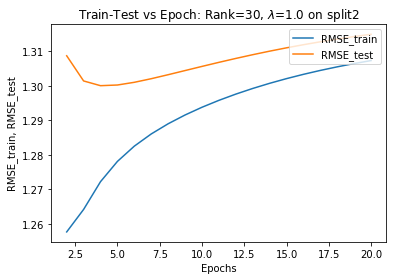

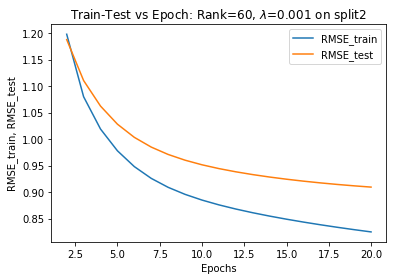

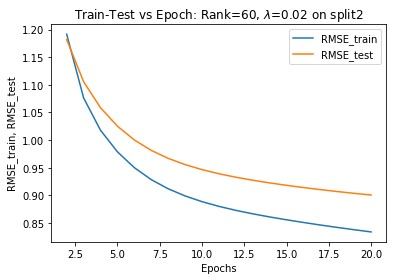

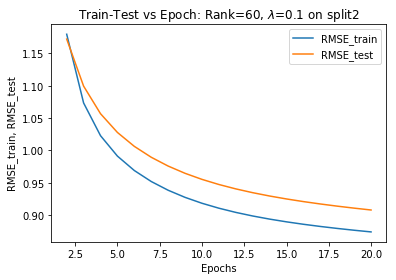

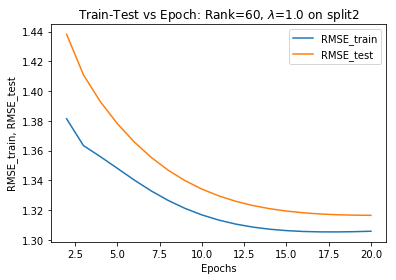

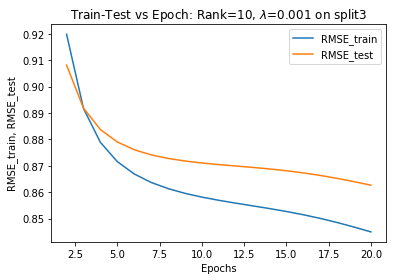

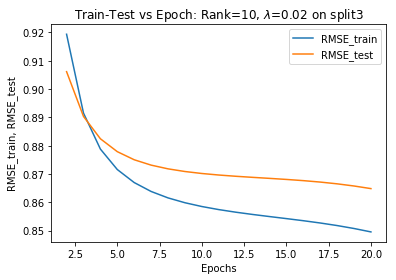

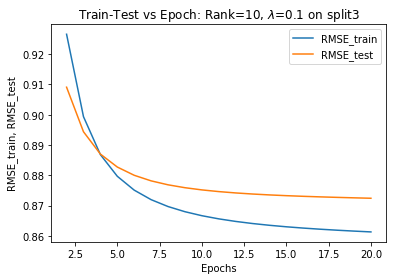

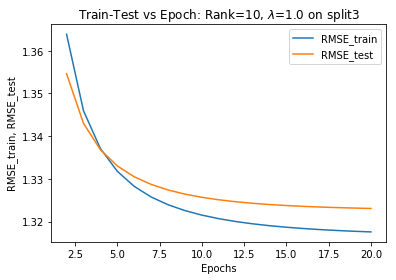

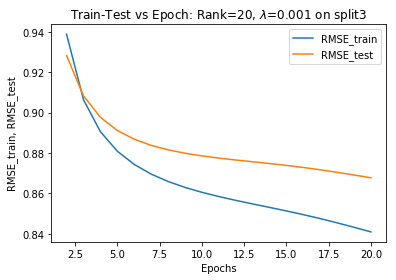

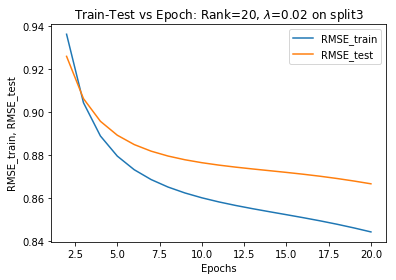

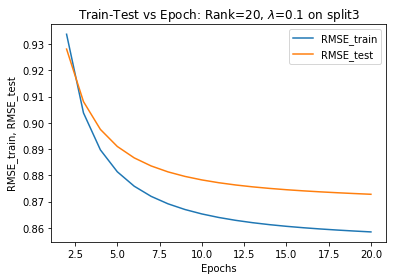

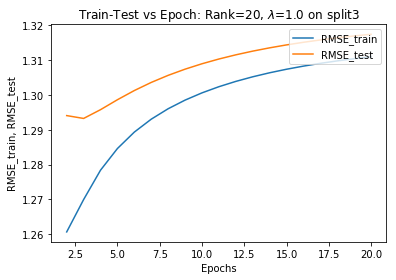

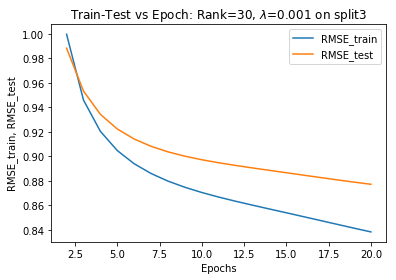

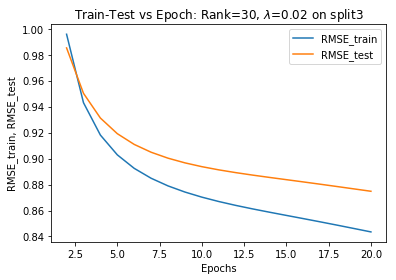

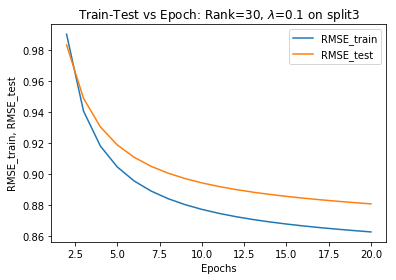

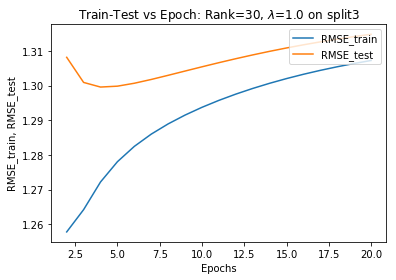

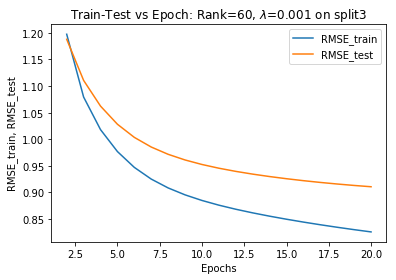

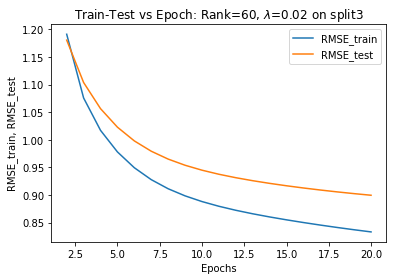

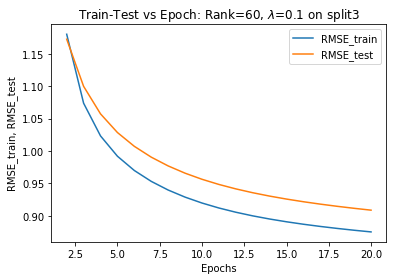

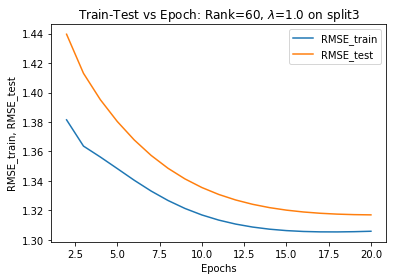

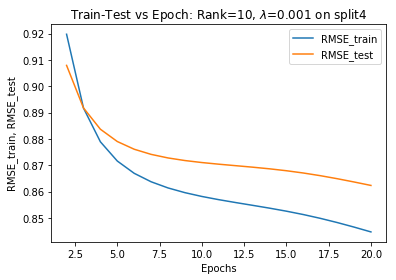

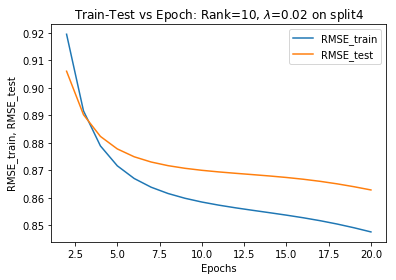

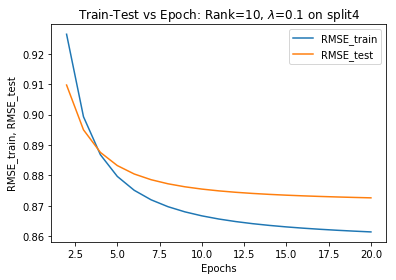

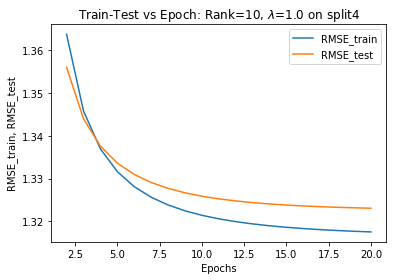

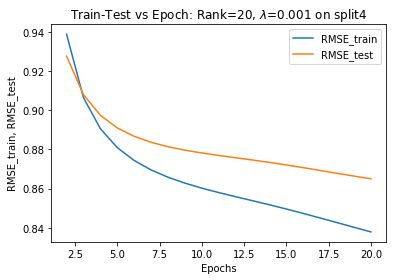

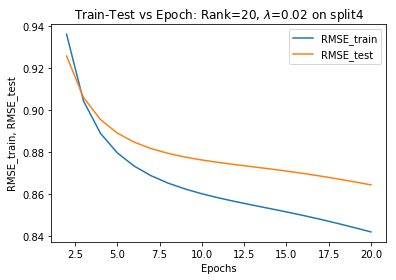

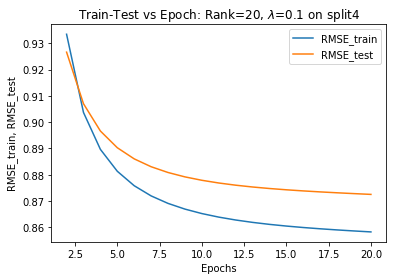

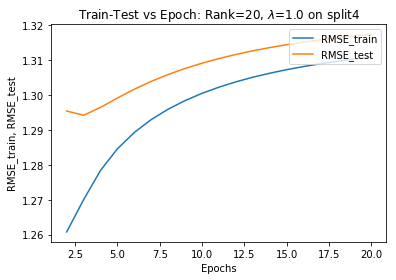

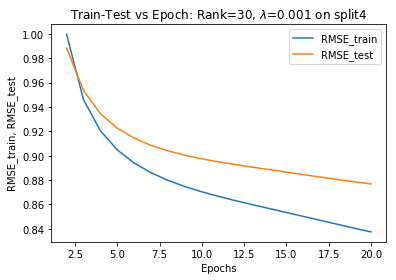

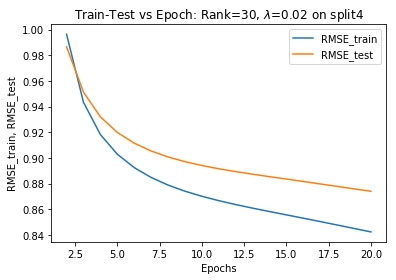

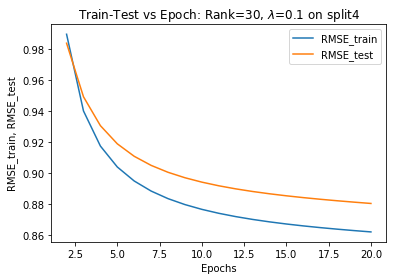

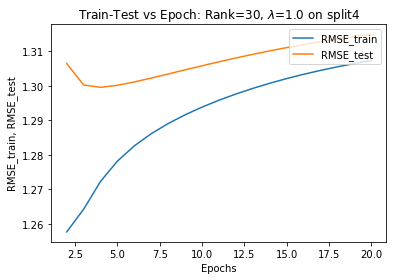

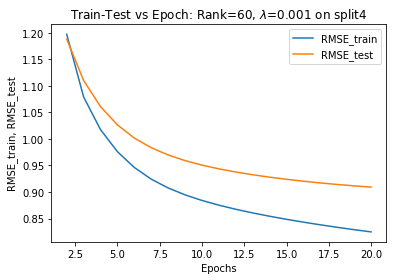

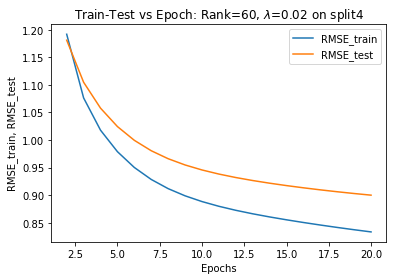

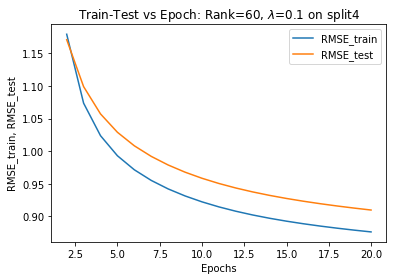

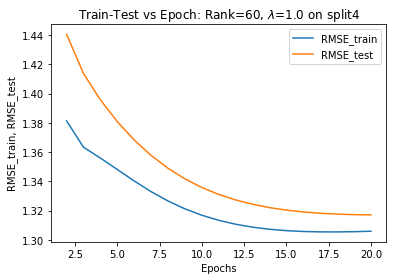

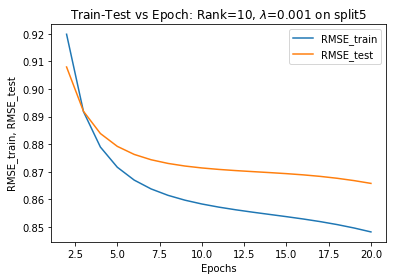

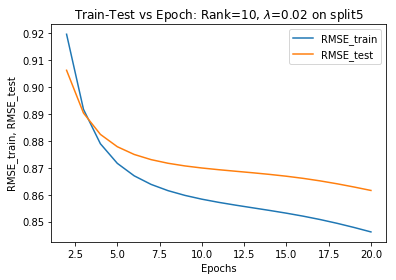

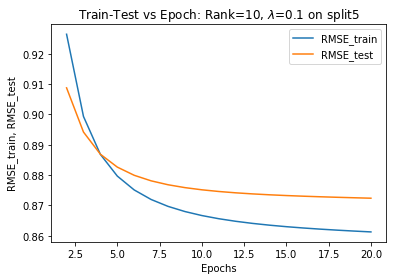

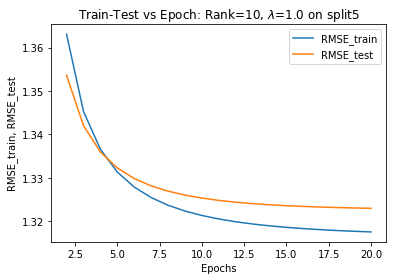

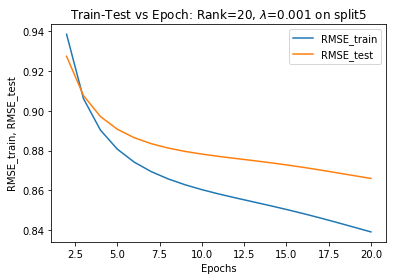

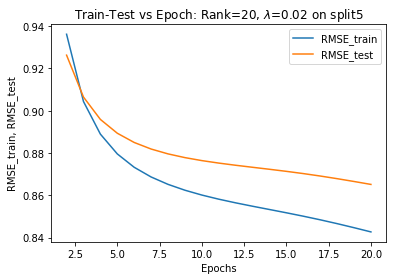

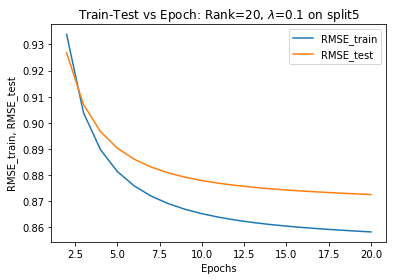

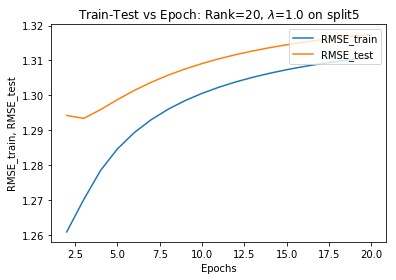

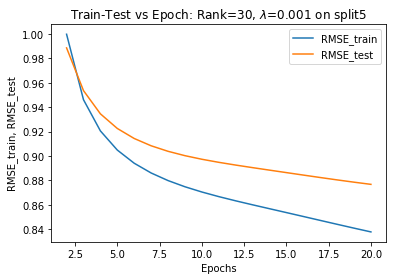

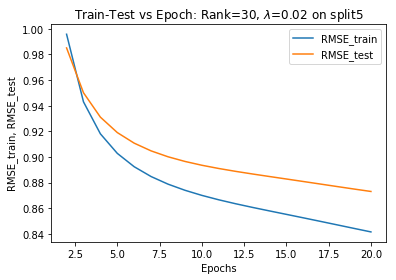

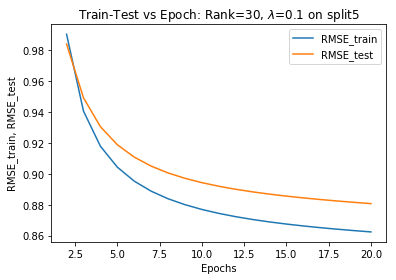

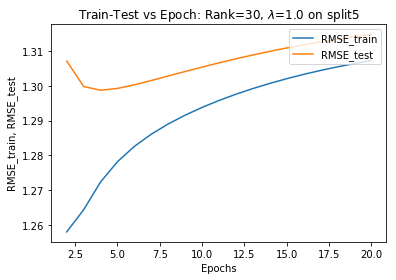

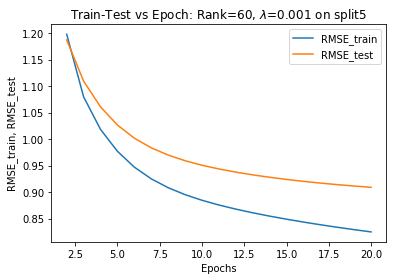

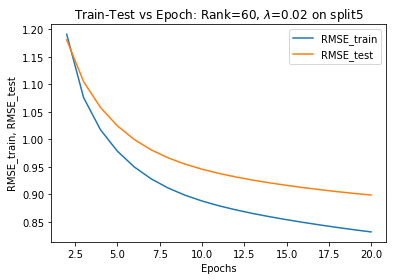

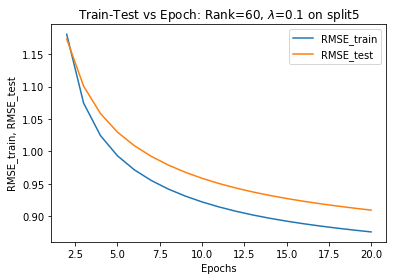

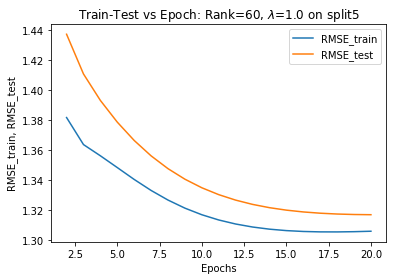

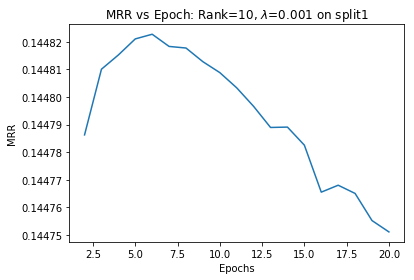

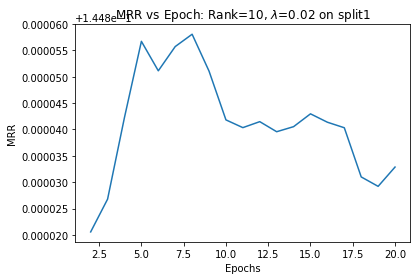

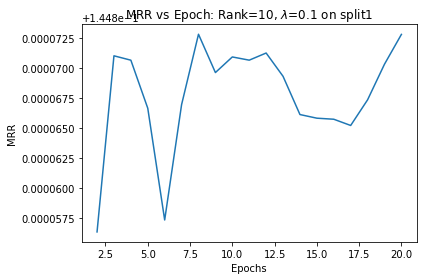

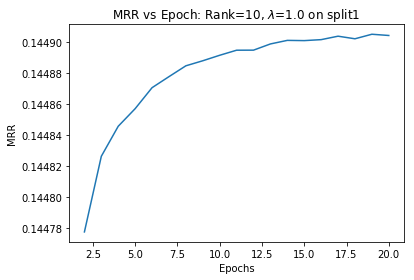

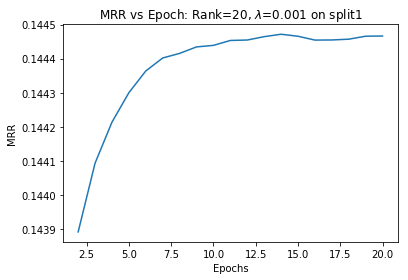

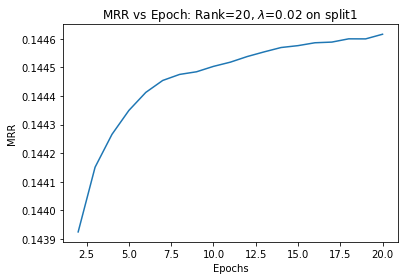

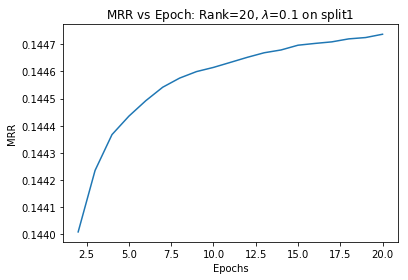

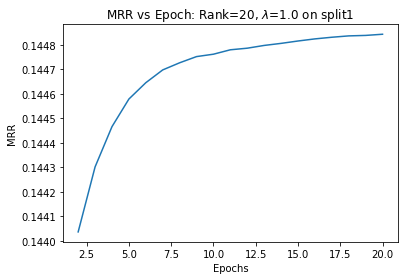

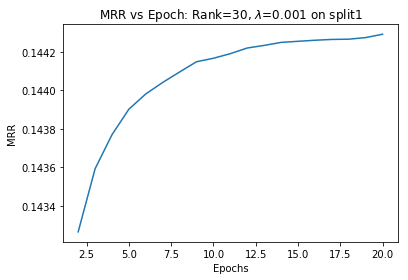

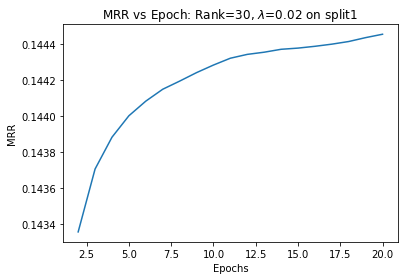

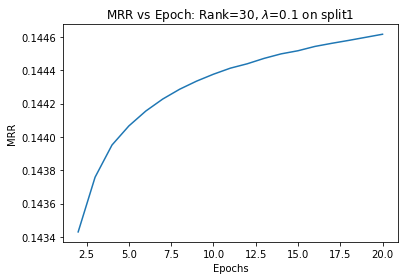

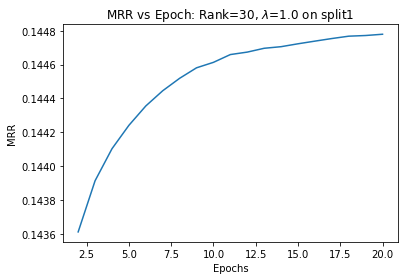

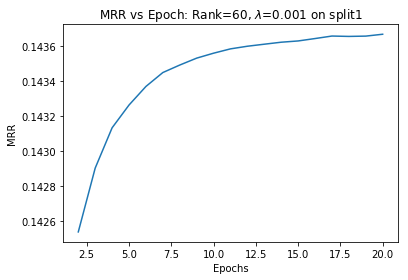

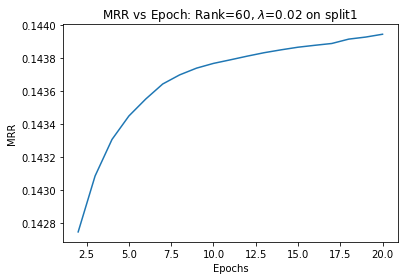

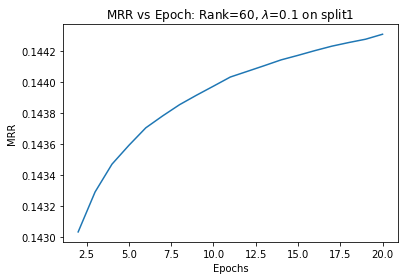

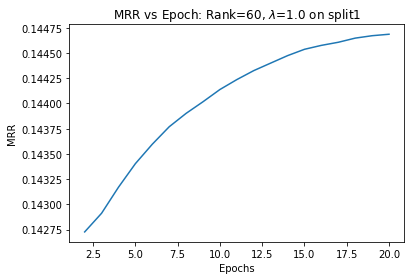

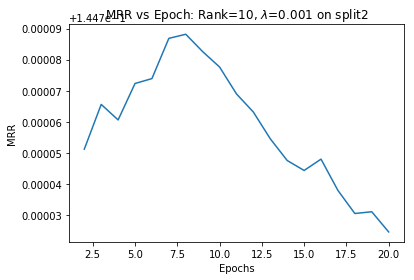

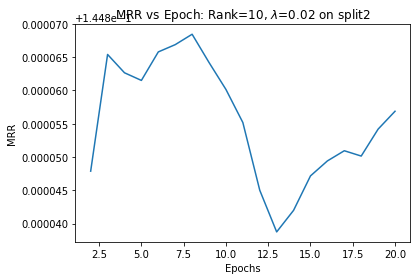

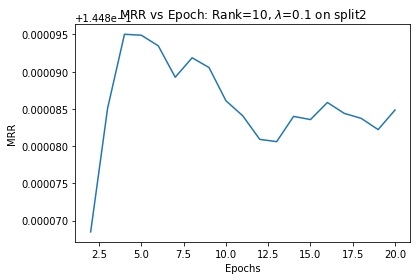

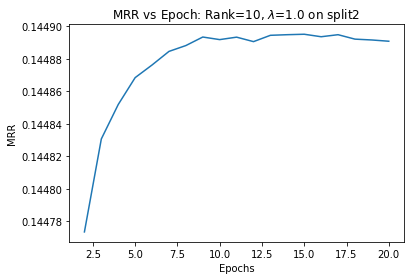

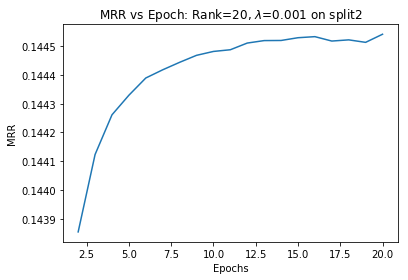

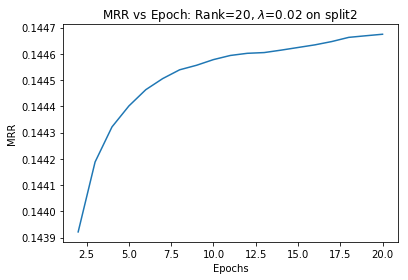

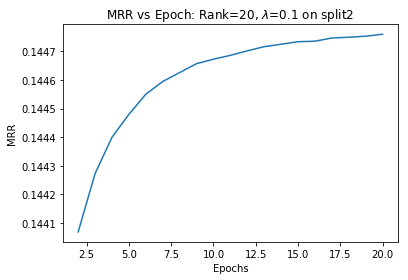

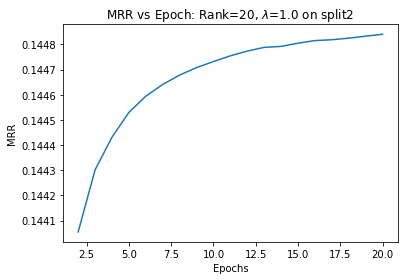

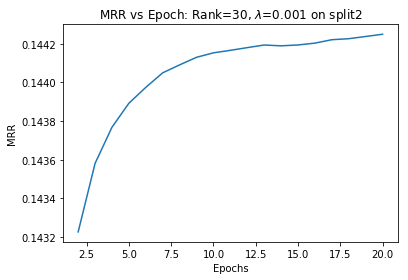

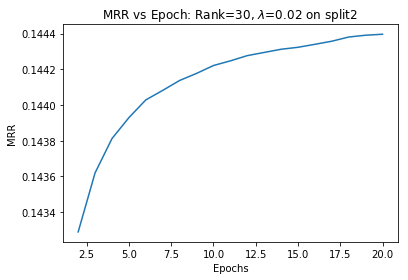

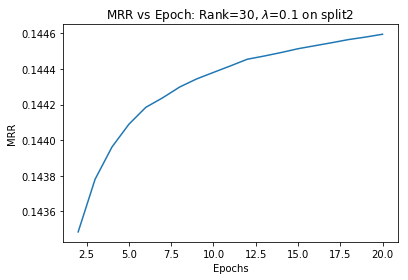

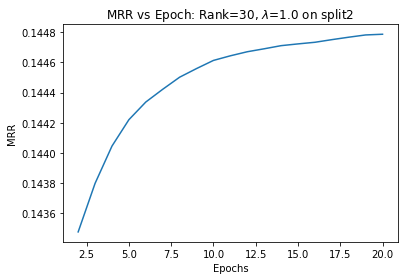

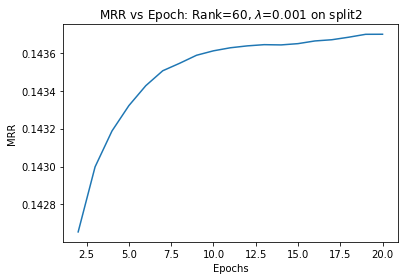

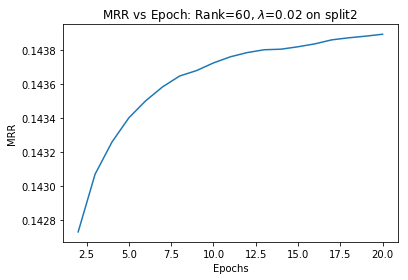

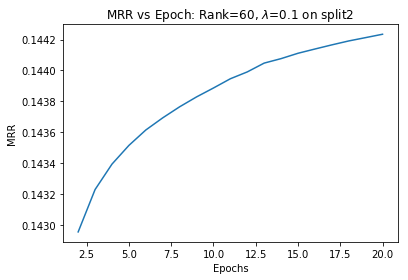

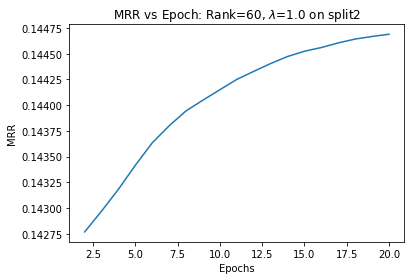

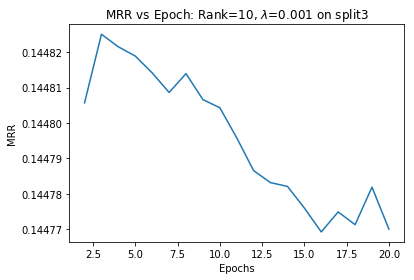

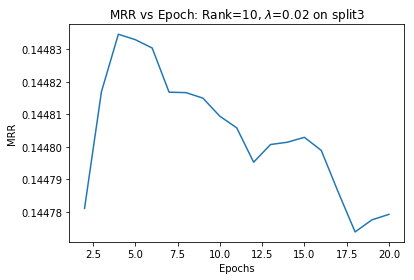

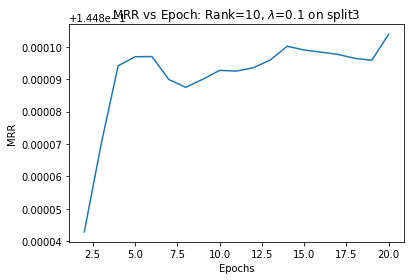

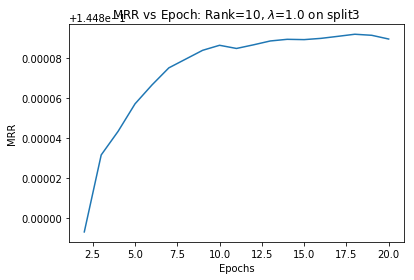

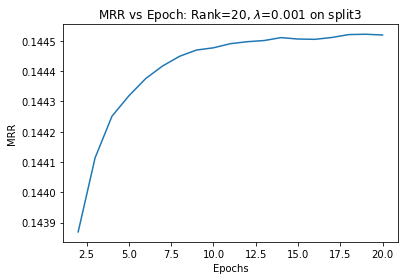

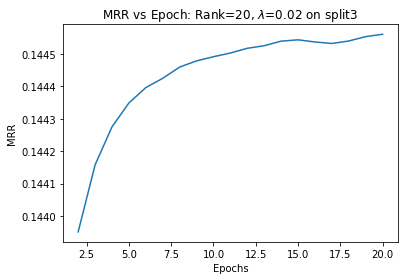

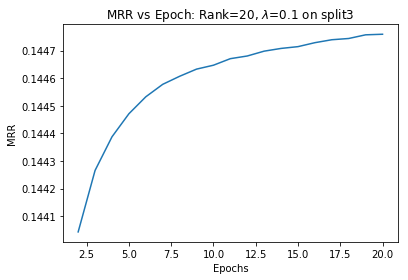

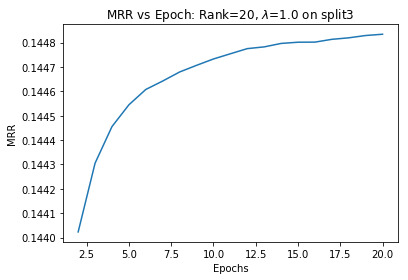

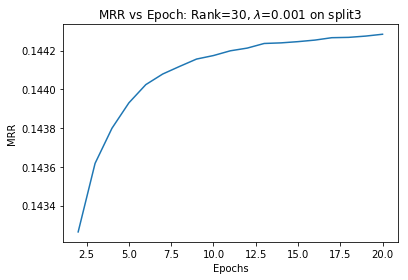

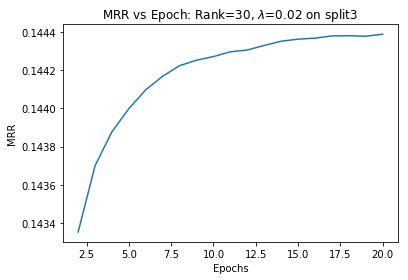

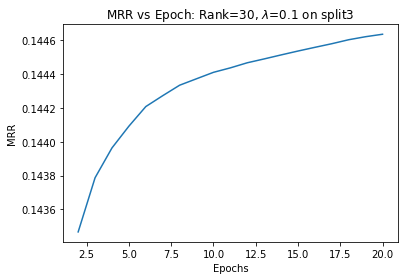

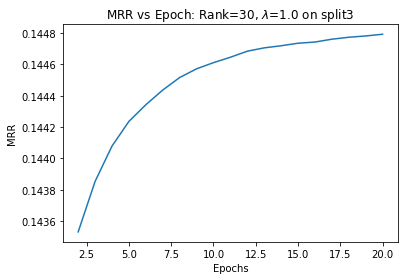

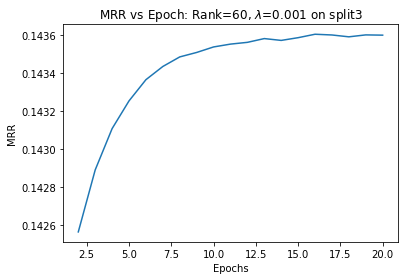

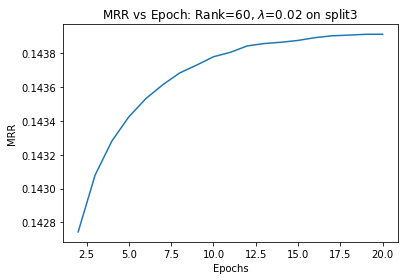

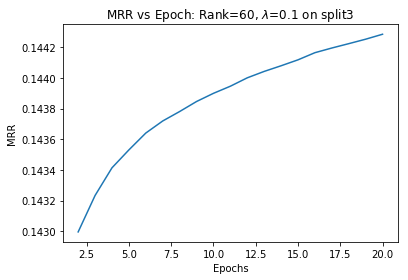

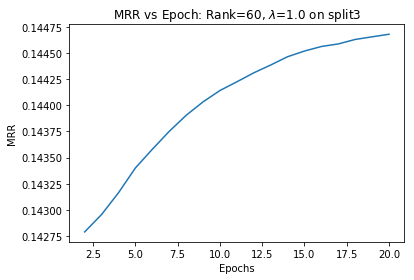

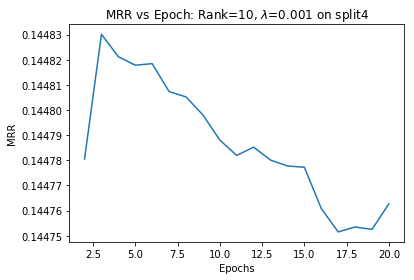

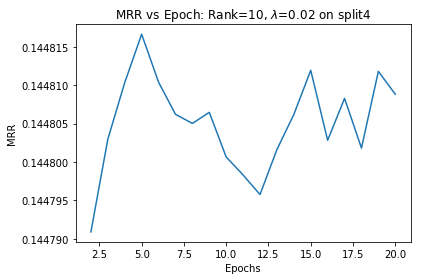

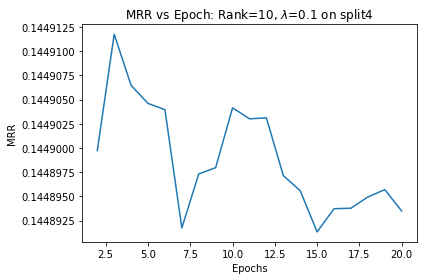

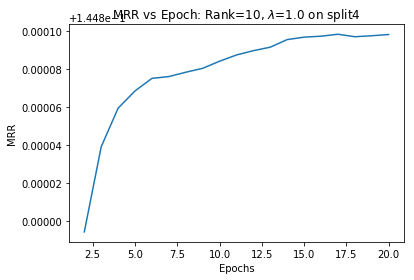

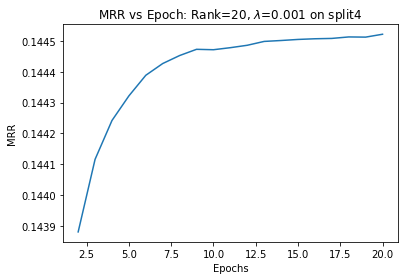

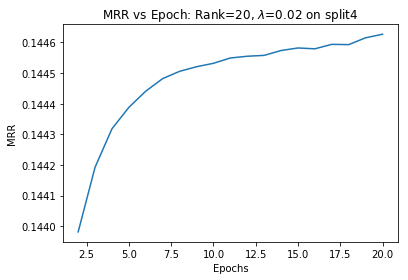

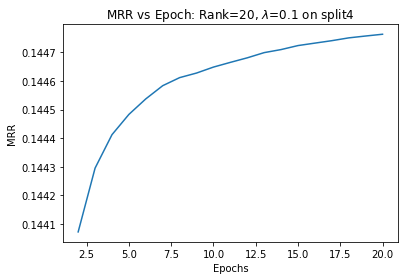

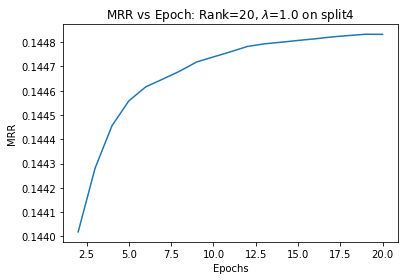

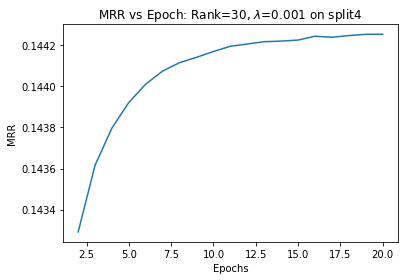

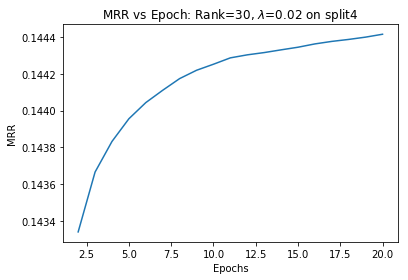

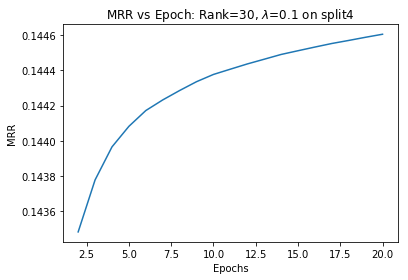

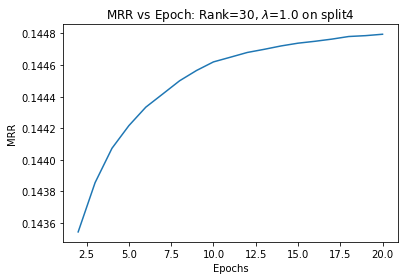

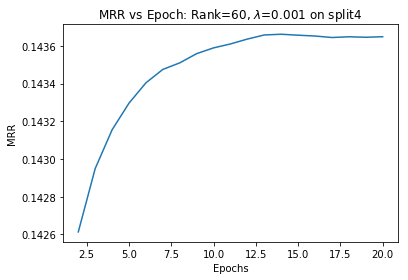

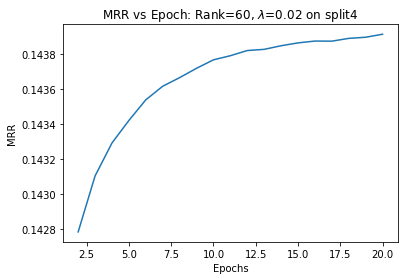

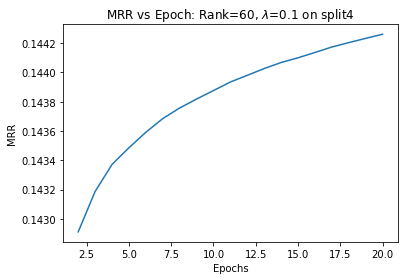

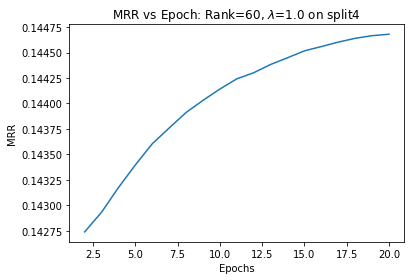

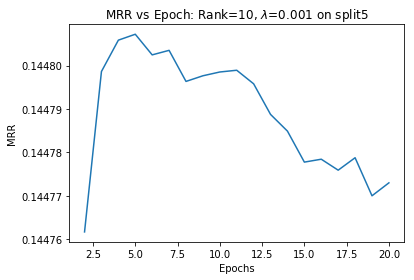

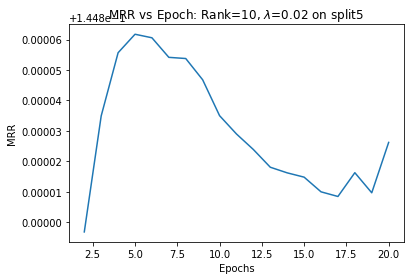

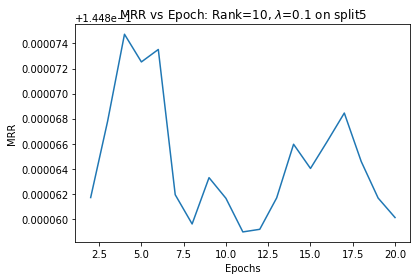

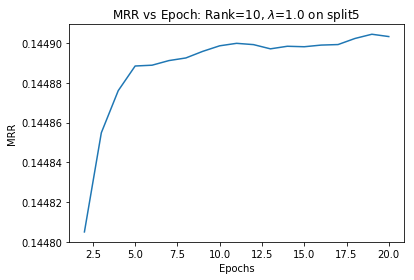

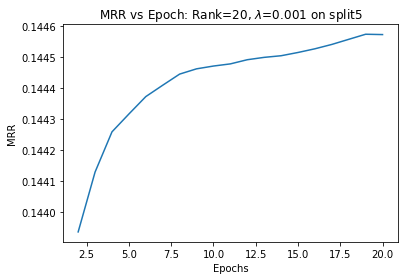

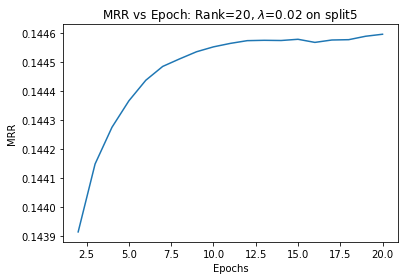

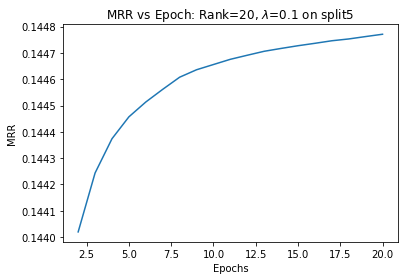

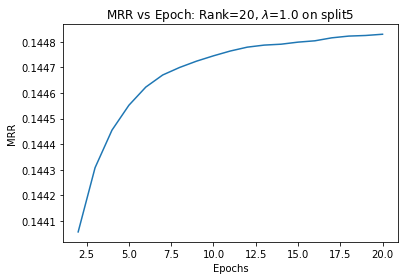

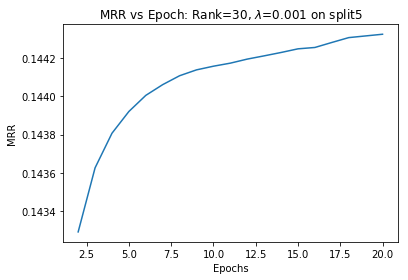

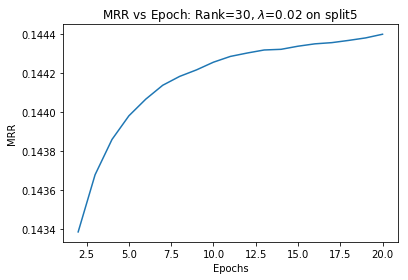

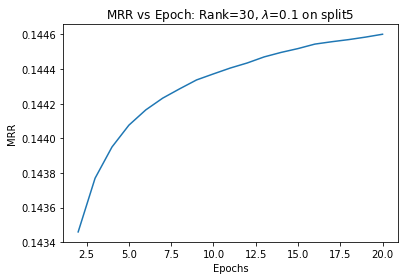

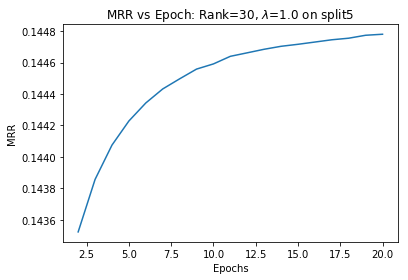

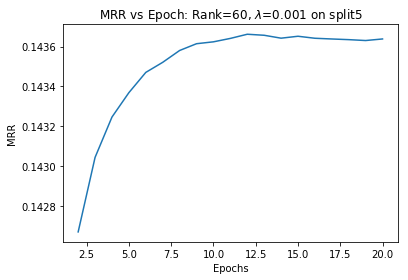

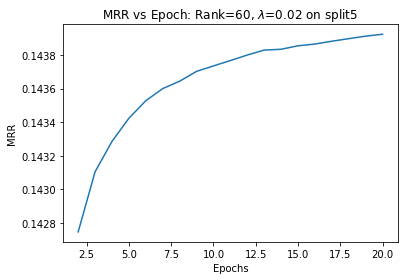

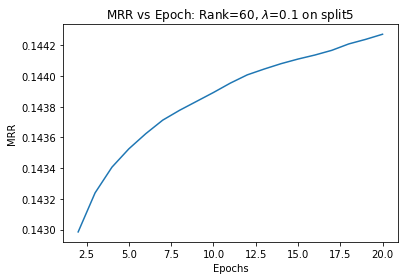

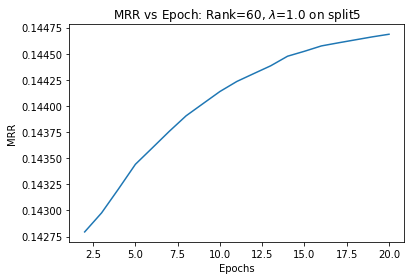

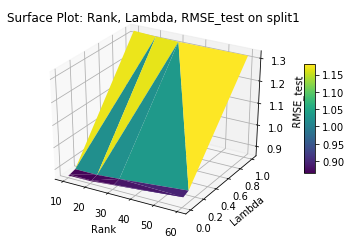

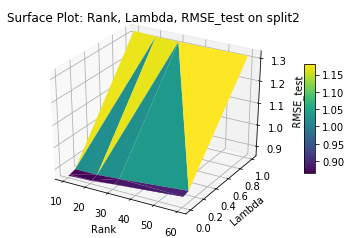

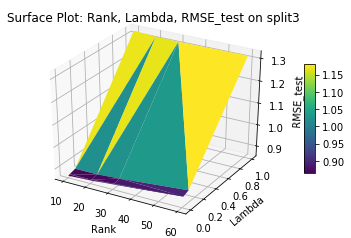

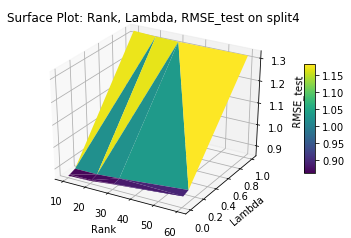

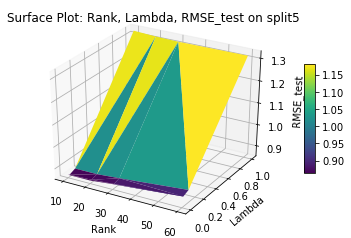

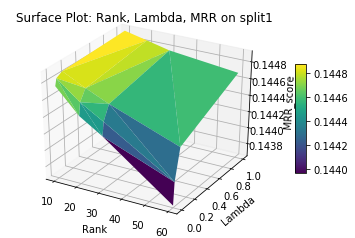

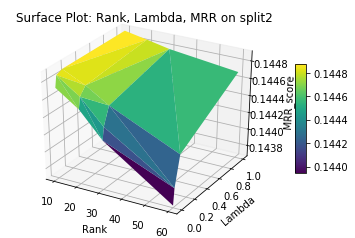

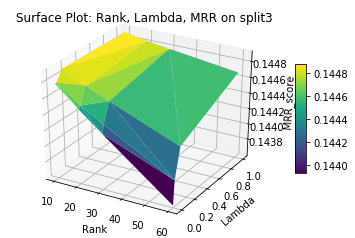

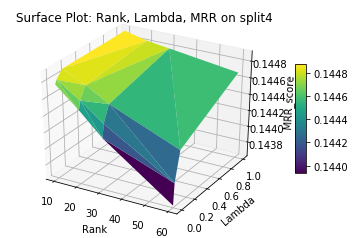

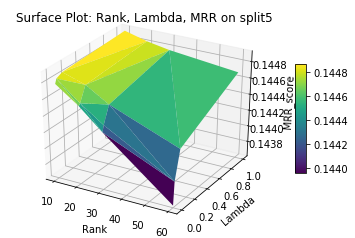

/Users/va/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:177: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



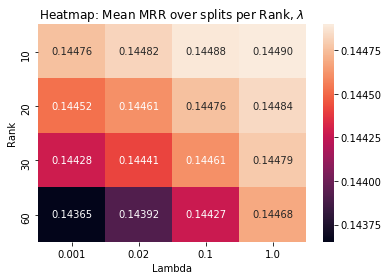

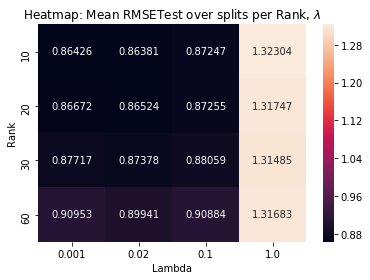

/Users/va/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:178: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



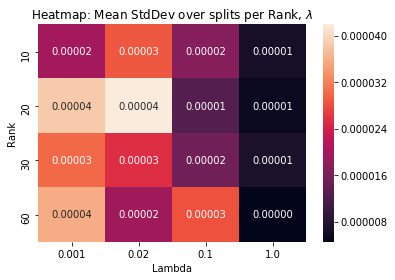

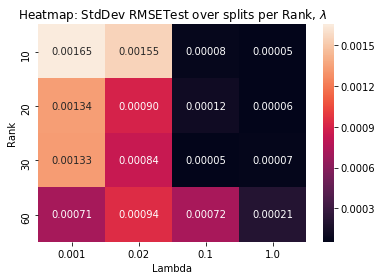

In [207]:
np.random.seed(0)
from mpl_toolkits.mplot3d import Axes3D

def draw_RMSE_heatmap(split_data):
    for split in split_data:
        split_name = split[:-4].replace("_", "")
        data = pd.read_csv(split, sep=" ", header=None)
        data.columns = ["Rank", "Lambda", "Iter", "RMSE_train", "RMSE_test", "MRR"]
        df = data.loc[data['Iter'] == 20].pivot_table(index='Rank', columns='Lambda', values='RMSE_train', aggfunc=np.median)
        sns.heatmap(df, annot=True, fmt=".5f")
        f_nm = "report/plots/heatmap_" + split_name + "_RMSEtest_rank_lambda"
        plt.title("Heatmap: final RMSE_test over Rank, " + r"$\lambda$" + " on " + split_name)
        plt.savefig("../" + f_nm.replace(".", "_") + ".png")
        plt.show()

def draw_MRR_heatmap(split_data):
    for split in split_data:
        split_name = split[:-4].replace("_", "")
        data = pd.read_csv(split, sep=" ", header=None)
        data.columns = ["Rank", "Lambda", "Iter", "RMSE_train", "RMSE_test", "MRR"]
        df = data.loc[data['Iter'] == 20].pivot_table(index='Rank', columns='Lambda', values='MRR', aggfunc=np.median)
        sns.heatmap(df, annot=True, fmt=".5f")
        f_nm = "report/plots/heatmap_" + split_name + "_MRR_rank_lambda"
        plt.title("Heatmap: final MRR over Rank, " + r"$\lambda$" + " on " + split_name)
        plt.savefig("../" + f_nm.replace(".", "_") + ".png")
        plt.show()
        
def draw_train_test_plot(split_data):
    for split in split_data:
        split_name = split[:-4].replace("_", "")
        data = pd.read_csv(split, sep=" ", header=None)
        data.columns = ["Rank", "Lambda", "Iter", "RMSE_train", "RMSE_test", "MRR"]
        for rank in [10, 20, 30, 60]:
            for lambd in [0.001, 0.02, 0.1, 1.0]:
                df = data.query("Rank == " + str(rank)  + " and Lambda == " + str(lambd) + " and Iter > 1")
                plt.plot(df['Iter'], df['RMSE_train'])
                plt.plot(df['Iter'], df['RMSE_test'])
                plt.xlabel('Epochs')
                plt.ylabel('RMSE_train, RMSE_test')
                plt.legend(['RMSE_train', 'RMSE_test'], loc='upper right')
                plt.title("Train-Test vs Epoch: Rank=" + str(rank) + ", "+r"$\lambda$" + "=" + str(lambd) + " on " + split_name)
                f_nm = "report/plots/train_test_vs_epoch_" + split_name + "_rank_" + str(rank) + "_lambd_" + str(lambd);
                plt.savefig("../" + f_nm.replace(".", "_") + ".png")
                plt.show()

def draw_MRR_plot(split_data):
    for split in split_data:
        split_name = split[:-4].replace("_", "")
        data = pd.read_csv(split, sep=" ", header=None)
        data.columns = ["Rank", "Lambda", "Iter", "RMSE_train", "RMSE_test", "MRR"]
        for rank in [10, 20, 30, 60]:
            for lambd in [0.001, 0.02, 0.1, 1.0]:
                df = data.query("Rank == " + str(rank)  + " and Lambda == " + str(lambd) + " and Iter > 1")
                plt.plot(df['Iter'], df['MRR'])
                plt.xlabel('Epochs')
                plt.ylabel('MRR')
                plt.title("MRR vs Epoch: Rank=" + str(rank) + ", "+r"$\lambda$" + "=" + str(lambd) + " on " + split_name)
                f_nm = "report/plots/MRR_vs_epoch_" + split_name + "_rank_" + str(rank) + "_lambd_" + str(lambd);
                plt.savefig("../" + f_nm.replace(".", "_") + ".png")
                plt.show()

def draw_surface_plot_RMSE(split_data):
    for split in split_data:
        split_name = split[:-4].replace("_", "")
        data = pd.read_csv(split, sep=" ", header=None)
        data.columns = ["Rank", "Lambda", "Iter", "RMSE_train", "RMSE_test", "MRR"]
        df=data[data['Iter'] == 20]
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.set_xlabel('Rank')
        ax.set_ylabel('Lambda')
        ax.set_zlabel('RMSE_test')
        surf = ax.plot_trisurf(df['Rank'], df['Lambda'], df['RMSE_test'], cmap=plt.cm.viridis, linewidth=1.0)
        fig.colorbar( surf, shrink=0.5, aspect=10)
        plt.title("Surface Plot: Rank, Lambda, RMSE_test on " + split_name)
        f_nm = "report/plots/SurfacePlot_RMSETest_Rank_Lambda_" + split_name;
        plt.savefig("../" + f_nm.replace(".", "_") + ".png")
        plt.show()
        
def draw_surface_plot_MRR(split_data):
    for split in split_data:
        split_name = split[:-4].replace("_", "")
        data = pd.read_csv(split, sep=" ", header=None)
        data.columns = ["Rank", "Lambda", "Iter", "RMSE_train", "RMSE_test", "MRR"]
        df=data[data['Iter'] == 20]
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.set_xlabel('Rank')
        ax.set_ylabel('Lambda')
        ax.set_zlabel('MRR_score')
        surf = ax.plot_trisurf(df['Rank'], df['Lambda'], df['MRR'], cmap=plt.cm.viridis, linewidth=1.0)
        fig.colorbar( surf, shrink=0.5, aspect=10)
        plt.title("Surface Plot: Rank, Lambda, MRR on " + split_name)
        f_nm = "report/plots/SurfacePlot_MRR_Rank_Lambda_" + split_name;
        plt.savefig("../" + f_nm.replace(".", "_") + ".png")
        plt.show()

def draw_heatmap_plot_mean_splits(split_data):
    df_series_MRR = {}
    df_series_RMSE = {}
    for split in split_data:
        split_name = split[:-4].replace("_", "")
        data = pd.read_csv(split, sep=" ", header=None)
        data.columns = ["Rank", "Lambda", "Iter", "RMSE_train", "RMSE_test", "MRR"]
        df_series_MRR[split_name] = data.loc[data['Iter'] == 20].pivot_table(index='Rank', columns='Lambda', values='MRR', aggfunc=np.median)
        df_series_RMSE[split_name] = data.loc[data['Iter'] == 20].pivot_table(index='Rank', columns='Lambda', values='RMSE_test', aggfunc=np.median)

    p_MRR = pd.Panel({n: df for n, df in enumerate([df_series_MRR["split1"],df_series_MRR["split2"],df_series_MRR["split3"],df_series_MRR["split4"],df_series_MRR["split5"]])})
    p_RMSE = pd.Panel({n: df for n, df in enumerate([df_series_RMSE["split1"],df_series_RMSE["split2"],df_series_RMSE["split3"],df_series_RMSE["split4"],df_series_RMSE["split5"]])})
    df1 = p_MRR.mean(axis=0)
    df2 = p_RMSE.mean(axis=0)
    
    sns.heatmap(df1, annot=True, fmt=".5f")
    f_nm = "report/plots/heatmap_Mean_MRR_over_splits"
    plt.title("Heatmap: Mean MRR over splits per Rank, " + r"$\lambda$")
    plt.savefig("../" + f_nm.replace(".", "_") + ".png")
    plt.show()
    
    sns.heatmap(df2, annot=True, fmt=".5f")
    f_nm = "report/plots/heatmap_Mean_RMSETest_over_splits"
    plt.title("Heatmap: Mean RMSETest over splits per Rank, " + r"$\lambda$")
    plt.savefig("../" + f_nm.replace(".", "_") + ".png")
    plt.show()

def draw_heatmap_plot_std_splits(split_data):
    df_series_MRR = {}
    df_series_RMSE = {}
    for split in split_data:
        split_name = split[:-4].replace("_", "")
        data = pd.read_csv(split, sep=" ", header=None)
        data.columns = ["Rank", "Lambda", "Iter", "RMSE_train", "RMSE_test", "MRR"]
        df_series_MRR[split_name] = data.loc[data['Iter'] == 20].pivot_table(index='Rank', columns='Lambda', values='MRR', aggfunc=np.median)
        df_series_RMSE[split_name] = data.loc[data['Iter'] == 20].pivot_table(index='Rank', columns='Lambda', values='RMSE_test', aggfunc=np.median)
    
    p_MRR = pd.Panel({n: df for n, df in enumerate([df_series_MRR["split1"],df_series_MRR["split2"],df_series_MRR["split3"],df_series_MRR["split4"],df_series_MRR["split5"]])})
    p_RMSE = pd.Panel({n: df for n, df in enumerate([df_series_RMSE["split1"],df_series_RMSE["split2"],df_series_RMSE["split3"],df_series_RMSE["split4"],df_series_RMSE["split5"]])})
    df1 = p_MRR.std(axis=0)
    df2 = p_RMSE.std(axis=0)
    
    sns.heatmap(df1, annot=True, fmt=".5f")
    f_nm = "report/plots/heatmap_StdDev_MRR_over_splits"
    plt.title("Heatmap: Mean StdDev over splits per Rank, " + r"$\lambda$")
    plt.savefig("../" + f_nm.replace(".", "_") + ".png")
    plt.show()
    
    sns.heatmap(df2, annot=True, fmt=".5f")
    f_nm = "report/plots/heatmap_StdDev_RMSETest_over_splits"
    plt.title("Heatmap: StdDev RMSETest over splits per Rank, " + r"$\lambda$")
    plt.savefig("../" + f_nm.replace(".", "_") + ".png")
    plt.show()

def draw_tables(split_data):
    for split in split_data:
        split_name = split[:-4].replace("_", "")
        data = pd.read_csv(split, sep=" ", header=None)
        data.columns = ["Rank", "Lambda", "Iter", "RMSE_train", "RMSE_test", "MRR"]
        for rank in [10, 20, 30, 60]:
            for lambd in [0.001, 0.02, 0.1, 1.0]:
                df = data.query("Rank == " + str(rank)  + " and Lambda == " + str(lambd))
                f_save_name = "tables/" + split_name + "_rank_" + str(rank) + "_lambd_" + str(lambd).replace(".", "_") + ".tex"
                with open("../report/" + f_save_name, 'w') as tf:
                #with open("../report/tables/label.tex",'w') as tf:
                    #tf.write(df.to_latex(index=False))
                    tf.write(df.to_latex(index=False))
                    #tf.write(.replace("\n\\caption{" + "Rank=" + str(rank)  + " and " + r"$\lambda$" + "=" + str(lambd) + "}\n")
                    tf.write("\n\\caption{"+split_name + ": Rank=" + str(rank)  + ", " + r"$\lambda$" + "=" + str(lambd) + "}\n")
                    #print("\\begin{table}[h!] \input{" + f_save_name + "} \end{table}")

def main():
    split_data = ["split_1.txt", "split_2.txt", "split_3.txt", "split_4.txt", "split_5.txt"]
    draw_RMSE_heatmap(split_data)
    draw_MRR_heatmap(split_data)
    draw_train_test_plot(split_data)
    draw_MRR_plot(split_data)
    draw_surface_plot_RMSE(split_data)
    draw_surface_plot_MRR(split_data)
    draw_heatmap_plot_mean_splits(split_data)
    draw_heatmap_plot_std_splits(split_data)
    draw_tables(split_data)

main()